In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd /content/drive/MyDrive/ML_Summer2023/UBER

/content/drive/MyDrive/ML_Summer2023/UBER


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML_Summer2023/UBER/uber_data.csv')


In [ ]:

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df = df.drop_duplicates().reset_index(drop=True)
df['trip_id'] = df.index

datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['tpep_pickup_datetime'] = datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday


datetime_dim['datetime_id'] = datetime_dim.index

# datetime_dim = datetime_dim.rename(columns={'tpep_pickup_datetime': 'datetime_id'}).reset_index(drop=True)
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]

passenger_count_dim = df[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

trip_distance_dim = df[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = df[['RatecodeID']].reset_index(drop=True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

pickup_location_dim = df[['pickup_longitude', 'pickup_latitude']].reset_index(drop=True)
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']]


dropoff_location_dim = df[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop=True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
payment_type_dim = df[['payment_type']].reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

fact_table = df.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

datetime_dim.to_csv('datetime_dim.csv', index=False)
passenger_count_dim.to_csv('passenger_count_dim.csv', index=False)
trip_distance_dim.to_csv('trip_distance_dim.csv', index=False)
rate_code_dim.to_csv('rate_code_dim.csv', index=False)
pickup_location_dim.to_csv('pickup_location_dim.csv', index=False)
dropoff_location_dim.to_csv('dropoff_location_dim.csv', index=False)
payment_type_dim.to_csv('payment_type_dim.csv', index=False)
fact_table.to_csv('fact_table.csv', index=False)








In [ ]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2016-03-01 06:17:10,2016-03-01 06:22:15,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,2016-03-01 06:17:10,2016-03-01 06:32:41,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,2016-03-01 06:17:10,2016-03-01 06:37:23,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,2016-03-01 06:17:10,2016-03-01 06:22:09,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16


In [ ]:
data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime']=pd.to_datetime(data['tpep_dropoff_datetime'])

In [ ]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2016-03-01 06:17:10,2016-03-01 06:22:15,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,2016-03-01 06:17:10,2016-03-01 06:32:41,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,2016-03-01 06:17:10,2016-03-01 06:37:23,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,2016-03-01 06:17:10,2016-03-01 06:22:09,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16


In [ ]:
data['duration']=(data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']).dt.total_seconds()

In [ ]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,475.0
1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,666.0
2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,1866.0
3,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.0
4,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2016-03-01 06:17:10,2016-03-01 06:22:15,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,305.0
99996,2016-03-01 06:17:10,2016-03-01 06:32:41,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,931.0
99997,2016-03-01 06:17:10,2016-03-01 06:37:23,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14,1213.0
99998,2016-03-01 06:17:10,2016-03-01 06:22:09,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16,299.0


In [ ]:
data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
duration                        float64
dtype: object

In [ ]:
data=data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1).copy()


In [ ]:
data

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,475.0
1,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,666.0
2,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,1866.0
3,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.0
4,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,305.0
99996,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,931.0
99997,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14,1213.0
99998,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16,299.0


In [ ]:
data=data[data['fare_amount']>0].copy()
data

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,475.0
1,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,666.0
2,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,1866.0
3,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.0
4,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,305.0
99996,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,931.0
99997,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14,1213.0
99998,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16,299.0


In [ ]:
data['RatecodeID'].value_counts()

1    97108
2     2206
5      276
3      260
4       48
6        1
Name: RatecodeID, dtype: int64

In [ ]:
df=data.copy()
df

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,475.0
1,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,666.0
2,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,1866.0
3,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.0
4,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,305.0
99996,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,931.0
99997,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14,1213.0
99998,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16,299.0


In [ ]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
passenger_count,1.000000,-0.016684,-0.002752,0.002905,-0.018722,-0.002194,0.002174,-0.009268,-0.010000,-0.098163,0.012814,-0.002742,-0.002336,-0.002096,-0.010184,0.001969
trip_distance,-0.016684,1.000000,-0.011852,0.012464,0.411013,-0.010540,0.011262,-0.068268,0.893818,0.068290,-0.153244,0.576654,0.642921,0.004853,0.896732,0.140052
pickup_longitude,-0.002752,-0.011852,1.000000,-0.998639,0.110699,0.902873,-0.901865,0.008771,0.019339,0.018476,-0.054124,0.008685,-0.006901,-0.014188,0.016629,-0.005396
pickup_latitude,0.002905,0.012464,-0.998639,1.000000,-0.110727,-0.902268,0.903094,-0.008521,-0.018607,-0.019354,0.054156,-0.008217,0.008139,0.014211,-0.015833,0.005529
RatecodeID,-0.018722,0.411013,0.110699,-0.110727,1.000000,0.078783,-0.079296,-0.028609,0.548351,-0.056406,-0.640493,0.342241,0.435966,-0.079202,0.549803,0.044955
dropoff_longitude,-0.002194,-0.010540,0.902873,-0.902268,0.078783,1.000000,-0.999029,0.011821,0.019679,0.018956,-0.036409,0.007394,-0.002466,0.000541,0.017189,-0.004379
dropoff_latitude,0.002174,0.011262,-0.901865,0.903094,-0.079296,-0.999029,1.000000,-0.011239,-0.019035,-0.018693,0.037984,-0.007504,0.002791,-0.000613,-0.016646,0.004384
payment_type,-0.009268,-0.068268,0.008771,-0.008521,-0.028609,0.011821,-0.011239,1.000000,-0.077504,0.082006,0.013842,-0.503077,-0.067985,0.002015,-0.160061,-0.008958
fare_amount,-0.010000,0.893818,0.019339,-0.018607,0.548351,0.019679,-0.019035,-0.077504,1.000000,-0.019973,-0.297600,0.600962,0.622608,-0.018743,0.983365,0.148705
extra,-0.098163,0.068290,0.018476,-0.019354,-0.056406,0.018956,-0.018693,0.082006,-0.019973,1.000000,0.011216,-0.051156,-0.055072,0.003567,-0.017247,-0.036131


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

def convert_to_categorical(df):
    kmeans = KMeans(n_clusters=8, random_state=42)
    coordinates = df[['pickup_latitude', 'pickup_longitude']].values
    clusters = kmeans.fit_predict(coordinates)
    df['pickup_region'] = clusters

    #df.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1, inplace=True)
    return df

df = convert_to_categorical(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_region
0,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,475.0,0
1,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,666.0,0
2,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,1866.0,5
3,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.0,4
4,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,305.0,0
99996,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,931.0,6
99997,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14,1213.0,7
99998,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16,299.0,0


In [ ]:
df['pickup_region'].value_counts()

0    47911
7    26023
6    19951
4     2971
5     2124
1      915
2        3
3        1
Name: pickup_region, dtype: int64

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

def convert_to_categorical(df):
    kmeans = KMeans(n_clusters=8, random_state=42)
    coordinates = df[['dropoff_latitude', 'dropoff_longitude']].values
    clusters = kmeans.fit_predict(coordinates)
    df['dropoff_region'] = clusters

    #df.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1, inplace=True)
    return df

df = convert_to_categorical(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['dropoff_region'].value_counts()

3    48969
0    21661
7    19171
6     4080
5     3628
4     1503
1      884
2        3
Name: dropoff_region, dtype: int64

In [ ]:
data1=df.copy()
data1

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_region,dropoff_region
0,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,475.0,0,7
1,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,666.0,0,7
2,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,1866.0,5,5
3,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,0.0,4,3
4,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,0.0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,305.0,0,3
99996,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,931.0,6,3
99997,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14,1213.0,7,6
99998,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16,299.0,0,3


In [ ]:
data1=data1.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','fare_amount',	'extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge'],axis=1).copy()
data1

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,total_amount,duration,pickup_region,dropoff_region
0,1,2.50,1,N,1,12.35,475.0,0,7
1,1,2.90,1,N,1,15.35,666.0,0,7
2,2,19.98,1,N,1,63.80,1866.0,5,5
3,3,10.78,1,N,1,41.62,0.0,4,3
4,5,30.43,3,N,1,113.80,0.0,7,7
...,...,...,...,...,...,...,...,...,...
99995,1,0.50,1,N,2,5.80,305.0,0,3
99996,1,3.40,1,N,1,16.80,931.0,6,3
99997,1,9.70,1,N,1,44.14,1213.0,7,6
99998,1,0.92,1,N,1,8.16,299.0,0,3


In [ ]:
# normalize the tripdistance
#label encode store_and_fwd_flag
data1['store_and_fwd_flag'].value_counts()

N    99775
Y      124
Name: store_and_fwd_flag, dtype: int64

In [ ]:
data1.dtypes

passenger_count         int64
trip_distance         float64
RatecodeID              int64
store_and_fwd_flag     object
payment_type            int64
total_amount          float64
duration              float64
pickup_region           int32
dropoff_region          int32
dtype: object

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
data1['store_and_fwd_flag']=le.fit_transform(data1['store_and_fwd_flag'])

In [ ]:
data1

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,total_amount,duration,pickup_region,dropoff_region
0,1,2.50,1,0,1,12.35,475.0,0,7
1,1,2.90,1,0,1,15.35,666.0,0,7
2,2,19.98,1,0,1,63.80,1866.0,5,5
3,3,10.78,1,0,1,41.62,0.0,4,3
4,5,30.43,3,0,1,113.80,0.0,7,7
...,...,...,...,...,...,...,...,...,...
99995,1,0.50,1,0,2,5.80,305.0,0,3
99996,1,3.40,1,0,1,16.80,931.0,6,3
99997,1,9.70,1,0,1,44.14,1213.0,7,6
99998,1,0.92,1,0,1,8.16,299.0,0,3


<Axes: >

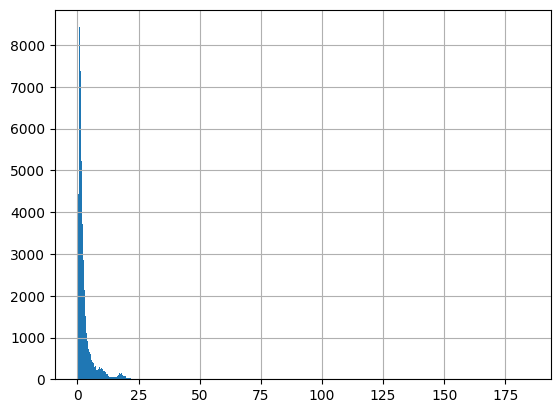

In [ ]:
data1['trip_distance'].hist(bins=1000)


In [ ]:
data1['payment_type'].value_counts()

1    66539
2    33179
3      137
4       44
Name: payment_type, dtype: int64

In [ ]:
X=data1.drop('total_amount',axis=1).copy()
Y=data1.iloc[::,5].copy()

In [ ]:
X

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,duration,pickup_region,dropoff_region
0,1,2.50,1,0,1,475.0,0,7
1,1,2.90,1,0,1,666.0,0,7
2,2,19.98,1,0,1,1866.0,5,5
3,3,10.78,1,0,1,0.0,4,3
4,5,30.43,3,0,1,0.0,7,7
...,...,...,...,...,...,...,...,...
99995,1,0.50,1,0,2,305.0,0,3
99996,1,3.40,1,0,1,931.0,6,3
99997,1,9.70,1,0,1,1213.0,7,6
99998,1,0.92,1,0,1,299.0,0,3


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=X[['store_and_fwd_flag','payment_type']])

In [ ]:
X_train['store_and_fwd_flag'].value_counts()

0    79819
1      100
Name: store_and_fwd_flag, dtype: int64

In [ ]:
X_test['store_and_fwd_flag'].value_counts()

0    19956
1       24
Name: store_and_fwd_flag, dtype: int64

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
model=GradientBoostingRegressor(learning_rate=0.03)

In [ ]:
model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.03)

In [ ]:
model.score(X_train,y_train)

0.9209422525400324

In [ ]:
model.score(X_test,y_test)

0.9247738175797307

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
output=pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).reset_index()
output.drop('index',axis=1)

,Actual,Predicted
0,7.40,8.807144
1,6.80,7.823924
2,17.80,17.866868
3,9.96,10.229958
4,5.30,6.950113
...,...,...
19975,14.80,14.155039
19976,60.41,51.216583
19977,14.76,14.691642
19978,26.15,24.034530


In [ ]:
output.to_csv('/content/drive/MyDrive/ML_Summer2023/UBER/result.csv')

In [ ]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

15.012720234697685

In [ ]:
mean_squared_log_error(y_test,y_pred)

0.017632441795104366

In [ ]:
r2_score(y_test,y_pred)

0.9247738175797307